# Feature correlation

Correlation between main weapon used and various "features" of the round on different maps

In [7]:
import sqlite3

import seaborn as sns

from s2_analytics.collector.sqlite_collector import SqliteCollector
from s2_analytics.constants import WEAPONS_PRIMARY, WEAPONS_SECONDARY
from s2_analytics.importer import import_games
from s2_analytics.main_weapon_analyzer import MainWeaponRoundTagger
from s2_analytics.team_round_tag_correlation_analyzer import TeamRoundTagCorrelationAnalyzer

conn = sqlite3.connect("file::memory:")
sqlite_collector = SqliteCollector(sqlite_conn=conn).init()
tag_correlation_analyzer = TeamRoundTagCorrelationAnalyzer(conn, sqlite_collector, [MainWeaponRoundTagger([WEAPONS_PRIMARY, WEAPONS_SECONDARY])]).init()
import_games("logs_ranked/", period_days=90, processors=[tag_correlation_analyzer, sqlite_collector])
pass

## Data summary

## Feature correlation

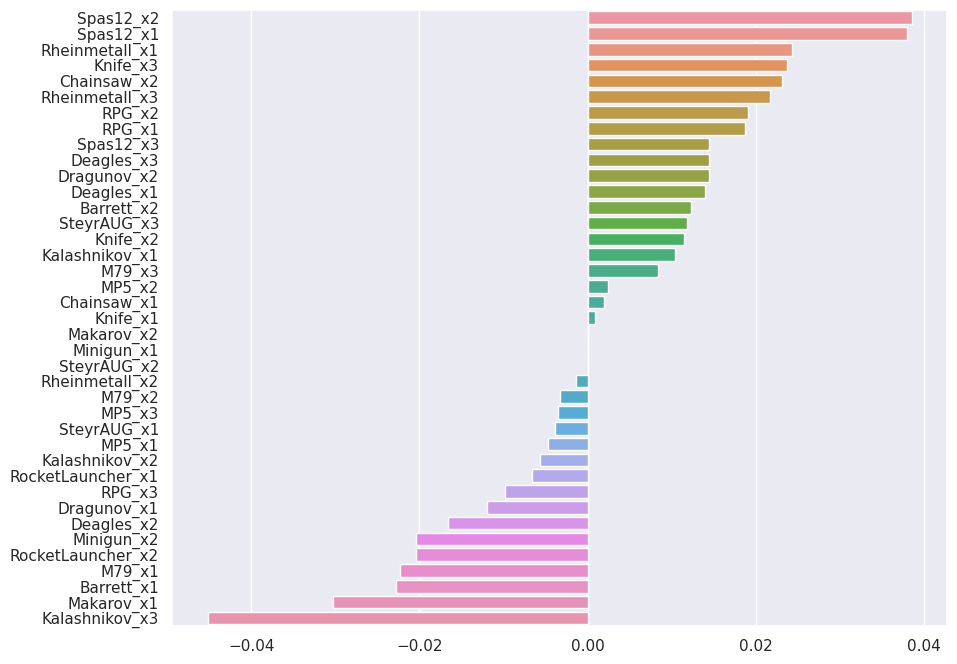

In [8]:
keys = []
values = []
correlation = tag_correlation_analyzer.calculate_win_correlation()
for key, value in sorted(correlation.items(), key=lambda a: a[1], reverse=True):
    keys.append(key)
    values.append(value)

sns.set(rc={'figure.figsize': (10, 8)})
sns.barplot(x=values, y=keys)
pass